In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

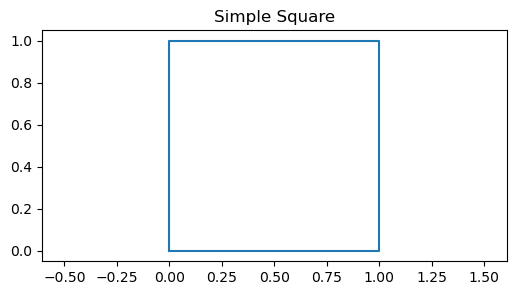

In [2]:
square = np.array(
    [
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
    ]).T  # Transpuesta para facilitar cálculos

# Dibujar figura
plt.figure(figsize=(6, 3))
plt.plot(square[0], square[1])
plt.axis('equal')
plt.grid(False)
plt.title("Simple Square")
plt.show()



In [3]:
def MatrizTraslacion(tx, ty):
    return np.array(
    [
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def MatrizRotacion(theta):
    return np.array(
    [
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def MatrizEscala(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])


In [5]:
# Crear carpeta temporal de imágenes
if not os.path.exists("frames"):
    os.makedirs("frames")

frames = []

square_hom = np.vstack([square, np.ones((1, square.shape[1]))])

for i in range(60):
    t = i / 60.0
    angle = 2 * np.pi * t  # Rotación completa
    scale = 1 + 0.5 * np.sin(angle)  # Escala oscilante
    tx, ty = np.cos(angle), np.sin(angle)  # Traslación en círculo

    M = MatrizTraslacion(tx, ty) @ MatrizRotacion(angle) @ MatrizEscala(scale, scale)

    transformed = M @ square_hom

    plt.figure(figsize=(5, 5))
    plt.text(-5,5,"Traslacion:")
    plt.text(-1,5,"Rotacion:")
    plt.text(3,5,"Escala:")
    plt.text(-5,3,np.round(MatrizTraslacion(tx, ty),2))
    plt.text(-1,3,np.round(MatrizRotacion(angle),2))
    plt.text(3,3,np.round(MatrizEscala(scale, scale),2))
    plt.plot(transformed[0, :], transformed[1, :])
    plt.title(f"Frame {i}")
    plt.axis('equal')
    plt.xlim(-6.5, 6.5)
    plt.ylim(-6.5, 6.5)
    filename = f"frames/frame_{i:03d}.png"
    plt.savefig(filename)
    plt.close()
    
    frames.append(filename)

with imageio.get_writer("animacion.gif", mode="I", duration=0.05, loop=0) as writer:
    for filename in frames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

for f in frames:
    os.remove(f)